In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
import input_data
import numpy

In [4]:
import sys
import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

* 定義 Input 及 Output 暫存變數
* Input 為 28x28 的點陣圖素
* Output 為 10 個 Label Array ，分別代表著 0~9 的預測值

In [7]:
x = tf.placeholder(tf.float32,shape=[None,28*28])
y = tf.placeholder(tf.float32,shape=[None,10])

In [22]:
# Create model

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

xw = tf.matmul(x, W)
r = xw + b
a = tf.nn.softmax(r)

* Cost Functoin 請參考 : http://ufldl.stanford.edu/tutorial/supervised/SoftmaxRegression/

In [33]:
cost = -tf.reduce_sum(y*tf.log(a))

In [34]:
op = tf.train.GradientDescentOptimizer(0.01).minimize(cost)

# 以下進行開始進行實際運算

In [35]:
init = tf.initialize_all_variables()

In [36]:
sess = tf.Session()

In [37]:
sess.run(init)

In [38]:
epochs = 100
batch_size = 200
for _ in range(100):
    avg_cost = 0
    input_x , output_y = mnist.train.next_batch(batch_size)
    sess.run(op,feed_dict={x:input_x,
                       y:output_y  })
    avg_cost += sess.run(cost,feed_dict={x:input_x,
                       y:output_y  })
    
    print "avg_cost:" ,avg_cost/batch_size
    
    


avg_cost: 1.53818847656
avg_cost: 4.20006500244
avg_cost: 3.53161804199
avg_cost: 5.75972351074
avg_cost: 6.60235961914
avg_cost: 5.1791998291
avg_cost: 5.26221313477
avg_cost: 1.79604919434
avg_cost: 2.81106994629
avg_cost: 1.26635177612
avg_cost: 0.970408935547
avg_cost: 2.00831665039
avg_cost: 1.75061691284
avg_cost: 2.19973968506
avg_cost: 1.0637865448
avg_cost: 0.93669631958
avg_cost: 1.28613098145
avg_cost: 0.47118812561
avg_cost: 0.464879074097
avg_cost: 0.662971420288
avg_cost: 0.668267059326
avg_cost: 0.584128265381
avg_cost: 0.624622650146
avg_cost: 1.04467071533
avg_cost: 1.78894287109
avg_cost: 0.916661224365
avg_cost: 0.863260498047
avg_cost: 1.38139678955
avg_cost: 0.785594482422
avg_cost: 0.40527130127
avg_cost: 0.748572311401
avg_cost: 1.42575210571
avg_cost: 0.672653656006
avg_cost: 0.317291584015
avg_cost: 0.412251815796
avg_cost: 0.291154708862
avg_cost: 0.362015991211
avg_cost: 0.316969490051
avg_cost: 0.463984222412
avg_cost: 0.530088119507
avg_cost: 0.25291891098


In [39]:
predict = tf.argmax(a, 1)
# sess.run(predict,feed_dict={x:mnist.test.images})

ans = tf.argmax(y,1)
# sess.run(ans, feed_dict= {y:mnist.test.labels})

preccision = sess.run(tf.reduce_mean(tf.cast(tf.equal(predict,ans),"float")),feed_dict= {x:mnist.test.images,y:mnist.test.labels}  )

In [40]:
print preccision

0.8163


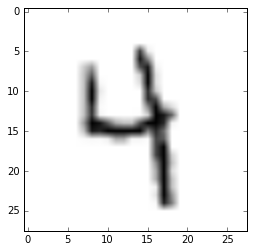

9


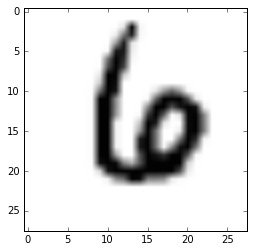

6


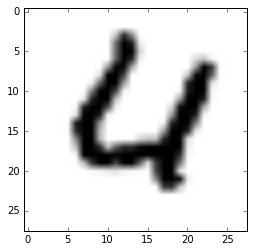

6


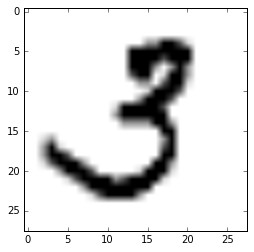

3


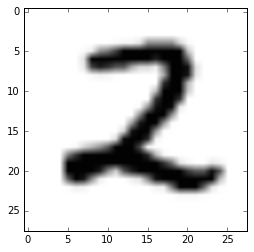

2


In [43]:
import random

for img in  list(map(lambda _: random.choice(mnist.train.images), range(5))): #mnist.train.images[50:55]:
    tmp = img
    tmp2 = tmp.reshape((28,28))

    plt.imshow(tmp2, cmap = cm.Greys)
    plt.show()
    print sess.run(predict,feed_dict={x:[tmp]})[0]


1
